# Airline Passenger Satisfaction Analysis
*Eine datengetriebene Analyse der Passagierzufriedenheit im Luftverkehr*

---

**Erstellt von:** Hasan Hüseyin Demirci, Andreas Hubertus, Sebastian Rein, Vitalii Solonychnyi  

**Modul:** Grundlagen Data Science und Künstliche Intelligenz 1

**Dozentin:** Prof. Dr. Jennifer Schoch  

**Hochschule:** Duale Hochschule Baden-Württemberg Karlsruhe

**Datum:** 22.11.2025

---

## Inhaltsverzeichnis

1. Einleitung
1.1 Motivation und Business Understanding
1.2 Zielsetzung

2. Data Understanding
2.1 



# 1. Einleitung
#### 1.1 Motivation und Business Understanding

Die Zufriedenheit von Flugpassagieren ist ein entscheidender Faktor für die Kundenbindung und das Markenimage von Fluggesellschaften. Sie haben daher ein großes Interesse daran, herauszufinden, wie genau die Zufriedenheit des Kunden gesteigert werden kann. 

#### 1.2 Zielsetzung


Die zentrale Forschungsfrage dieser Analyse lautet daher:
*Welche Faktoren beeinflussen die Gesamtzufriedenheit eines Flugpassagiers am meisten und inwiefern korrelieren die einzelenen Faktoren?*


Der Datensatz "Airline Passenger Satisfaction", der auf der bekannten Data Science-Website Kaggle zur Verfügung steht, ist hierfür die Grundlage.
Er kann über folgenden Link aufgerufen, gedownloaded und ausgelesen werden:

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

Die Analyse läuft auf Grundlage des CRISP-DM Prozesses.

Zu Beginn des Projekts haben wir eine sogenannte SMART-Zielsetzung festgelegt:

- *Specific:* Wir haben eine präzise Forschungsfrage formuliert.

- *Measurable:* Wir betrachten die Korrelationskoeffizienten ausgewählter Faktoren, um ihren Einfluss zu bewerten und zu vergleichen.

- *Achievable:* Wir nutzen Python mit grundlegenden Funktionen der Bibliotheken NumPy, Pandas und Matplotlib und folgen dem CRISP-DM Modell.

- *Realistic:* Wir überprüfen den Datensatz auf Glaubwürdigkeit und schätzen seine Aussagekraft ein

- *Time-bound:* Die Abgabefrist dieses Notebooks ist der 23.11.2025. Das mündliche Prüfungsgespräch findet am 01.12.2025 statt.

Am Ende soll dann ein Fazit gezogen und eine Empfehlung an Airlines gestellt werden, worauf sie beim Service den größten Fokus legen sollten und was welche Kunden gut beziehungsweise schlecht bewerten.


# 2. Data Understanding

#### 2.1 Grundlegende Struktur des Datensatzes

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
rows, cols = df.shape
print("Zeilen:", rows)
print("Spalten:", cols)

Zeilen: 103904
Spalten: 25


Der Datensatz umfasst Informationen zu 103.904 Flugpassagieren, die anhand von 24 Kategorien hinsichtlich ihrer Merkmale und persönlichen Bewertungen erfasst wurden.

In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Die Daten wurden durch eine Passagierumfrage erhoben.

### 2.2 Übersicht und Relevanz der Variablen

Zum einen sind persönliche Merkmale berücksichtigt, wie das Geschlecht (gender) oder das Alter (age) sowie die geflogene Klasse (class) oder die Art der Reise (type of travel). 
Zum anderen sind Bewertungen auf einer Skala von 1 bis 5 erkennbar, beispielsweise bezüglich der Verpflegung an Bord (food and drink) oder dem Umgang des Personals mit Gepäcksstücken (baggage handling).
Eine Bewertung mit 0 bedeutet, dass es keine Angabe gab.

Jede Variable ist entweder nominal, kardinal oder ordinal skaliert. Hier ist eine Auflistung aller Variablen samt ihrer Skalenniveaus:


| Merkmal                          | Bedeutung                                                | Skalenniveau |
|----------------------------------|----------------------------------------------------------|--------------|
| Unnamed: 0                       | Technische Index-Spalte (CSV-Export)                     | -            |
| id                               | Eindeutige Passagier-ID                                  | nominal      |
| Gender                           | Geschlecht des Passagiers                                | nominal      |
| Customer Type                    | Neukunde oder Bestandskunde                              | nominal      |
| Age                              | Alter in Jahren                                          | kardinal     |
| Type of Travel                   | Grund der Reise (Business / Personal)                    | nominal      |
| Class                            | Reiseklasse (Economy, Eco Plus, Business)                | ordinal      |
| Flight Distance                  | Flugdistanz in Meilen                                    | kardinal     |
| Inflight wifi service            | Bewertung des WLAN (1 = schlecht, 5 = sehr gut)          | ordinal      |
| Departure/Arrival time convenient| Bewertung der Zeitplanung (1–5)                          | ordinal      |
| Ease of Online booking           | Bewertung der Online-Buchung (1–5)                       | ordinal      |
| Gate location                    | Bewertung der Gate-Lage (1–5)                            | ordinal      |
| Food and drink                   | Bewertung von Essen & Trinken an Bord (1–5)              | ordinal      |
| Online boarding                  | Bewertung des Online-Boardings (1–5)                     | ordinal      |
| Seat comfort                     | Bewertung der Sitzqualität (1–5)                         | ordinal      |
| Inflight entertainment           | Bewertung des Bord-Entertainments (1–5)                  | ordinal      |
| On-board service                 | Bewertung des Kabinenservices (1–5)                      | ordinal      |
| Leg room service                 | Bewertung der Beinfreiheit (1–5)                         | ordinal      |
| Baggage handling                 | Bewertung der Gepäckabfertigung (1–5)                    | ordinal      |
| Checkin service                  | Bewertung des Check-in-Prozesses (1–5)                   | ordinal      |
| Inflight service                 | Bewertung des Service während des Flugs (1–5)            | ordinal      |
| Cleanliness                      | Bewertung der Sauberkeit (1–5)                           | ordinal      |
| Departure Delay in Minutes       | Abflugverspätung in Minuten                              | kardinal     |
| Arrival Delay in Minutes         | Ankunftsverspätung in Minuten                            | kardinal     |
| satisfaction                     | Zufriedenheit: satisfied / neutral or dissatisfied       | nominal      |


Bei allen Variablen ist durch die Spaltennamen intuitiv klar, welche Informationen daraus gewonnen werden können. 

Für die zentrale Fragestellung, welche Merkmale die Zufriedenheit der Passagiere stark beeinflussen, ist das Zielmerkmal also: satisfaction (satisfied / neutral or dissatisfied).

Es ist wichtig zu unterscheiden, auf welche Einflussfaktoren eine Airline direkt Einfluss nehmen. In engem Zusammenhang mit Service, Komfort oder Verspätungen stehen:

- Class  
- Seat comfort  
- Flight Distance  
- Inflight wifi service  
- Food and drink  
- Inflight entertainment  
- Leg room service  
- On-board service  
- Cleanliness  
- Checkin service  
- Baggage handling  
- Departure Delay in Minutes  
- Arrival Delay in Minutes 
- Arrival Delay in Minutes  

Teilweise relevante Merkmale, die zwar die Wahrnehmung eines Passagiers beeinflussen können, aber nicht den Service selbst, sind:

- Age  
- Type of Travel  
- Customer Type  
- Gender  


Das Attribut "id" trägt natürlich nicht zur Analyse der Zufriedenheit bei







Auffälig ist, dass die Bewertungen durchschnittlich fast alle im "3,"-Bereich liegen.

*An dieser Stelle müssen wir noch ausführlicher auf erste Erkenntisse eingehen*

Durch Indexing ist es möglich, gezielt Werte in unserem DataFrame zu filtern.
Wir formulieren folgende Fragen, die wir danach mithilfe von Indexing beantworten möchten:

- Wie hoch ist die Zufriedenheit (satisfaction) je nach Geschlecht und Alter?
- Wie hoch ist sie je nach Kundentyp beziehungsweise je nach Art der Reise?
- Welchen Einfluss haben Flugverspätungen auf die Zufriedenheit der Gäste?
- Wie werden die verschiedenen Service-Kategorien bewertet?
- Wirkt sich die geflogene Distanz (flight distance) auf die Zufriedenheit aus?


# 3. Data Preparation

In [6]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Der Datensatz enthält insgesamt sehr wenige fehlende Werte: nur 310 von über 100.000 Einträgen, und ausschließlich in der Spalte *Arrival Delay in Minutes*. Um die Informationen in den entsprechenden Zeilen dennoch nutzen zu können, füllen wir die fehlenden Werte mit dem Median der verspäteten Ankunftszeit:

In [7]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median())
df.isna().sum().sum()

np.int64(0)

Nach dem Imputing überprüfen wir erneut die Anzahl der fehlenden Werte – diese beträgt nun 0, sodass der Datensatz vollständig ist und für weitere Analysen verwendet werden kann.

# 4. Benfords Law – Überprüfung des Datensatzes

In diesem Abschnitt prüfen wir einige numerische Spalten unseres Datensatzes mit dem Benfordschen Gesetz.  
Benfords Law beschreibt die typische Verteilung der führenden Ziffern in natürlich vorkommenden Zahlen. Wenn die tatsächliche Verteilung davon stark abweicht, kann das auf ungewöhnliche Muster oder mögliche Probleme im Datensatz hinweisen.

Wir betrachten dafür die Spalten Flight Distance, Age, Arrival Delay in Minutes und Departure Delay in Minutes, extrahieren deren führende Ziffern und vergleichen sie mit der erwarteten Benford-Verteilung.

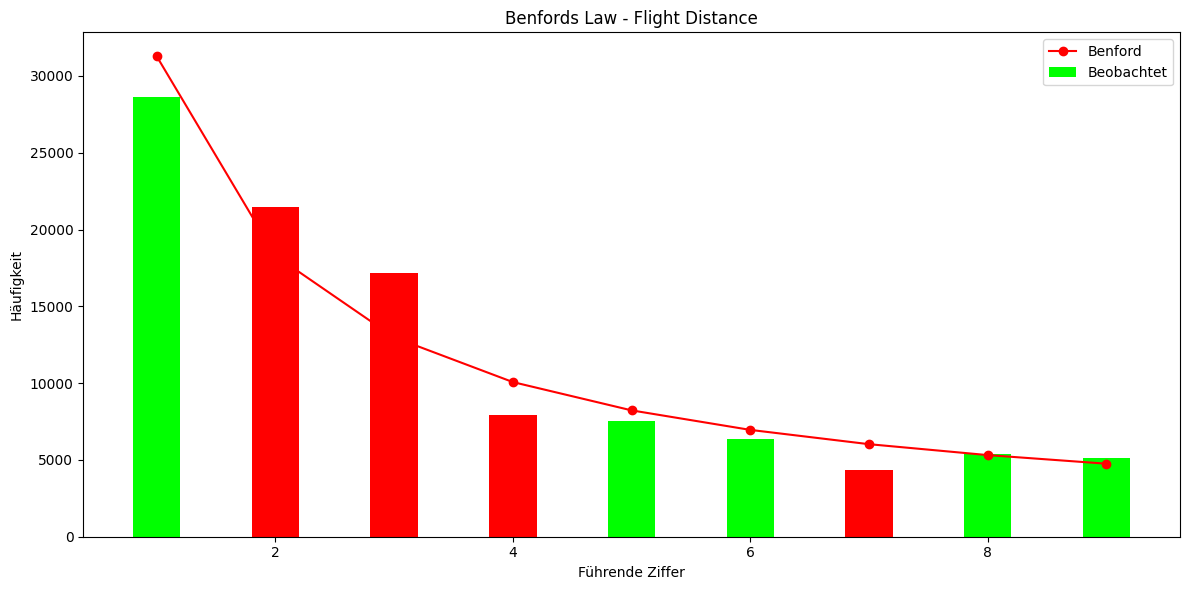

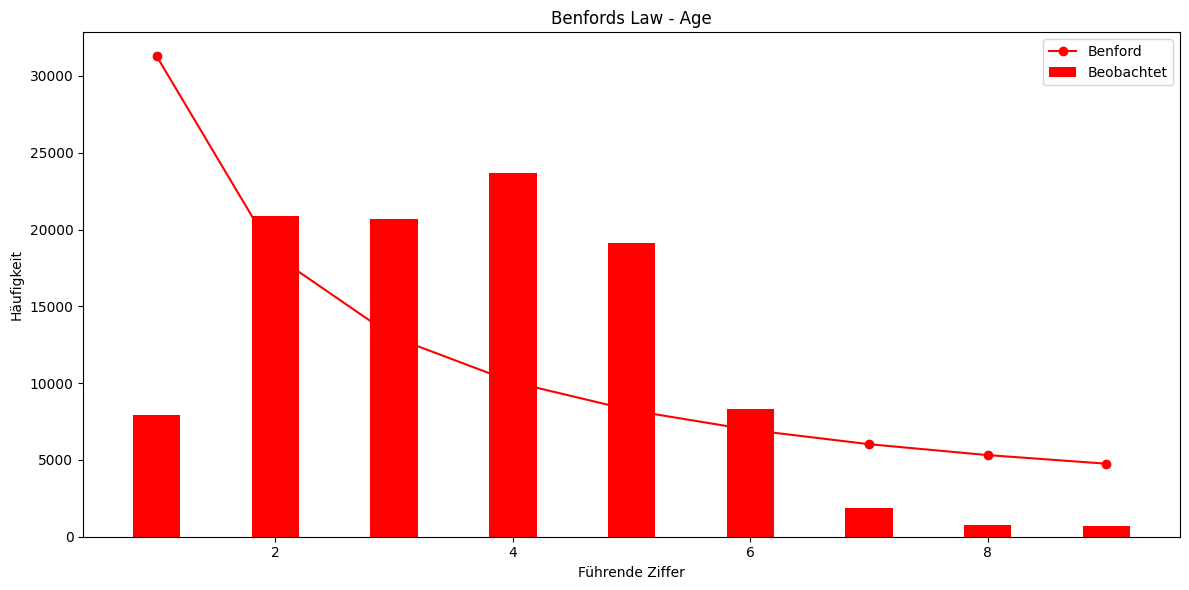

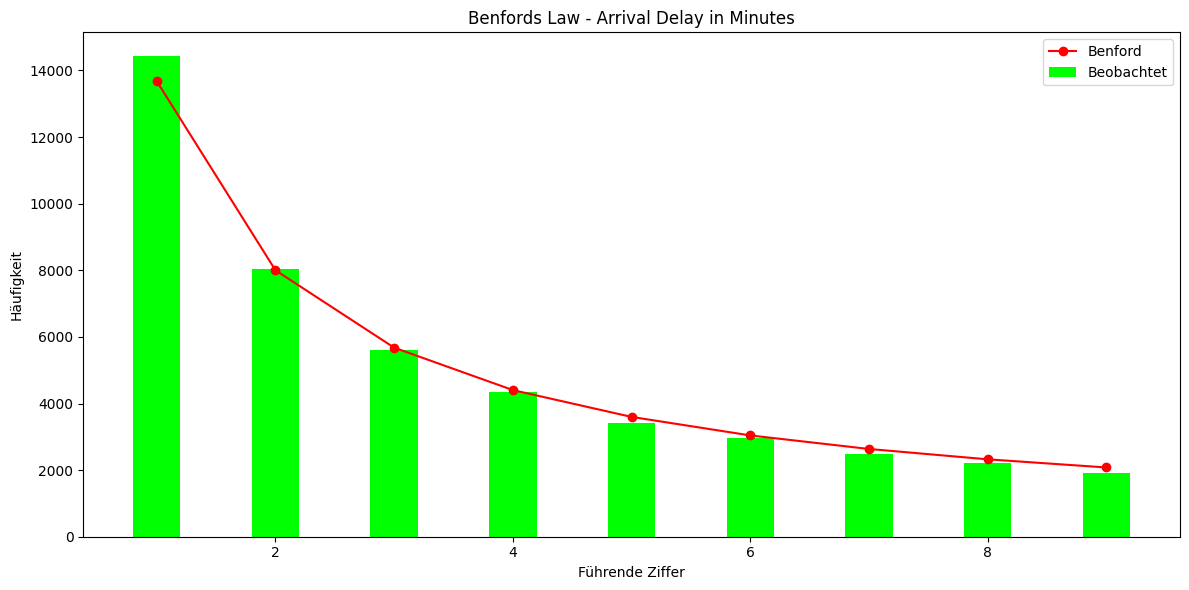

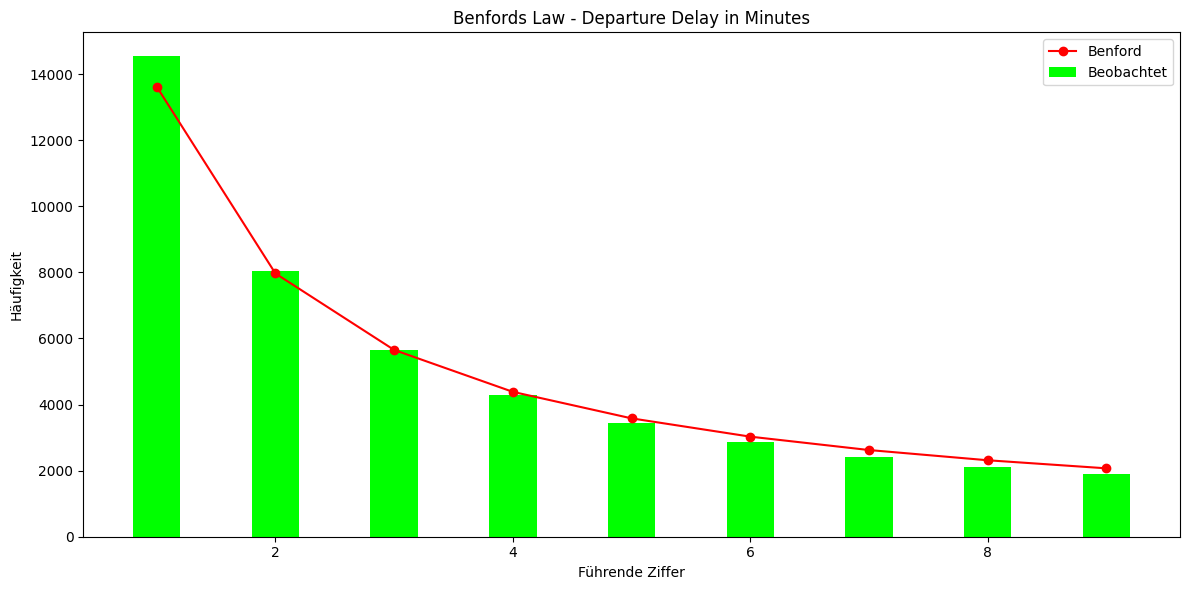

In [8]:
import matplotlib.pyplot as plt

columns = ["Flight Distance","Age","Arrival Delay in Minutes", "Departure Delay in Minutes"]


for column in columns:

    values = df[column]
    values = values[values > 0]

    # Extrahieren der führenden Ziffern
    leading = values.astype(str).str[0].astype(int)
    
    # Häufigkeiten der führenden Ziffern berechnen
    observed_counts = leading.value_counts().sort_index()
    
    # Benfordslaw Verteilungs erstellung
    benford = pd.Series({d: np.log10(1+1/d) for d in range(1,10)})* len(leading)

    # Farben basierend auf Abweichung von Benford
    colors = ["Lime" if abs(observed_counts[i]- benford[i])/ benford[i] < 0.1 else "Red" for i in range(1,10)]

    plt.figure(figsize=[12,6])
    plt.bar(observed_counts.index ,observed_counts.values, width = 0.4, label = "Beobachtet", color = colors)


    plt.plot(observed_counts.index  , benford, 'ro-' ,label = "Benford")
    plt.xlabel("Führende Ziffer")
    plt.ylabel("Häufigkeit")
    plt.title(f"Benfords Law - {column}")
    plt.legend()
    plt.tight_layout()
    plt.show()


   

# Ergebnisse: Folgen die Daten Benford?
Da eine Folge, die nicht exakt dem Benford-Gesetz entspricht streng genommen nicht wirklich folgen kann, haben wir vereinbart, dass wir eine folge als Benford-Konform betrachten, wenn die mittlere Abweichung unter 10 % liegt. Somit haben wir ein erstes Indiz dafür, dass unser Datensatz nicht manipuliert wurde und die Daten glaubwürdig sind.
## 1.Flight Distance
- Bei der Auswertung zeigt sich ein abnehmender Trend wie bei Benford, dieser ist jedoch zu Beginn deutlich schwächer ausgeprägt. Konkret betragt die Abweichung für die Zweite und dritte Ziffer 0.17 bzw 0,32.
## 2.Age
- Die Variable Age zeigt keinerlei Übereinstimmung mit Benfords Law und folgt eher einer Normalverteilung. Davon war von auszugehen, da die Altersverteilung natürlich nicht dem Benfords Law folgt.
## 3.Arrivel Delay in Minutes und 4.Departure Delay in Minutes
- Sowohl Arrival als auch Departure Delay folgen konsequent dem Benfords Law.
